In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Amazon Sale Report.csv")
df.head(7)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
5,5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,...,INR,824.00,GHAZIABAD,UTTAR PRADESH,201102.0,IN,False,NaN,NaN,NaN
6,6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,...,INR,653.00,CHANDIGARH,CHANDIGARH,160036.0,IN,False,NaN,NaN,NaN


In [4]:
df.shape

(128976, 21)

In [5]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [7]:
df.isna().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [8]:
df.drop(['New','PendingS'] , axis=1 , inplace=True)

In [9]:
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN


In [10]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [11]:
# Data Visualizations

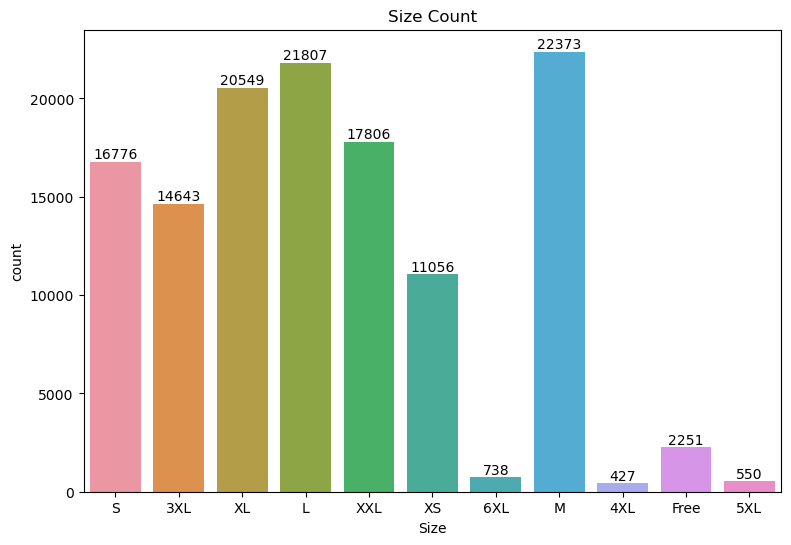

In [46]:
plt.figure(figsize=(9,6))
ax=sns.countplot(x='Size',data=df)
plt.title('Size Count')
for bars in ax.containers:
   ax.bar_label(bars)

In [13]:
df.groupby(['Size'],as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)

,Size,Qty
6,M,20138
5,L,19706
8,XL,18636
10,XXL,16246
7,S,15041
0,3XL,13360
9,XS,9850
4,Free,2070
3,6XL,688
2,5XL,513


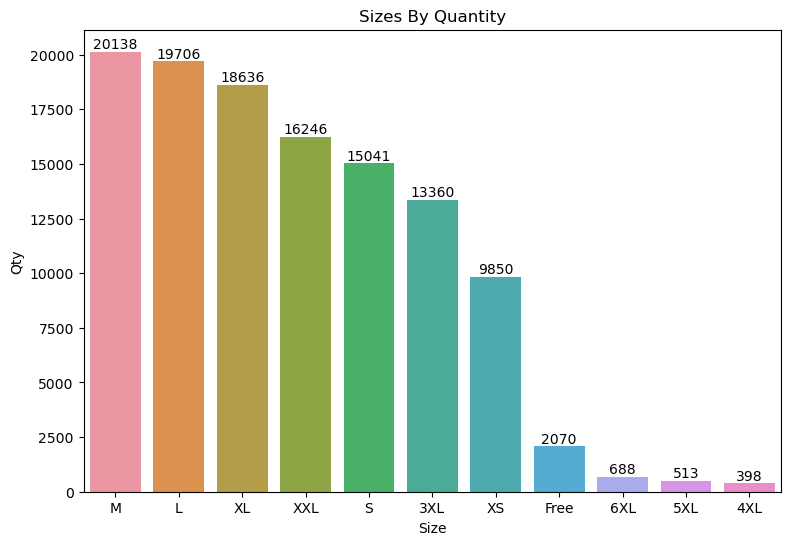

In [45]:
plt.figure(figsize=(9,6))
visual_1=df.groupby(['Size'],as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)
ax=sns.barplot(x='Size',y='Qty',data=visual_1)
plt.title('Sizes By Quantity')
for bars in ax.containers:
   ax.bar_label(bars)

Text(0.5, 1.0, 'Status of the Couriers')

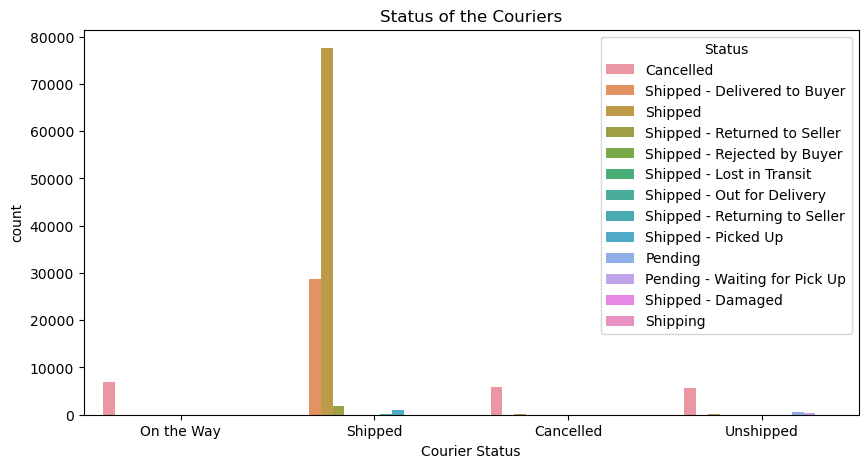

In [56]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='Courier Status',hue='Status',data=df)
plt.title("Status of the Couriers")


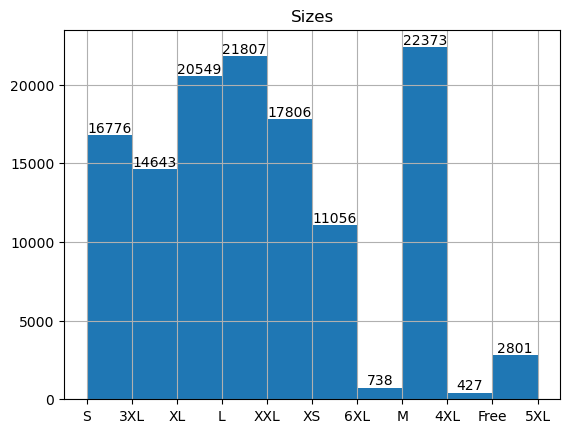

In [63]:
ax=df['Size'].hist()
plt.title("Sizes")

for bars in ax.containers:
   ax.bar_label(bars)

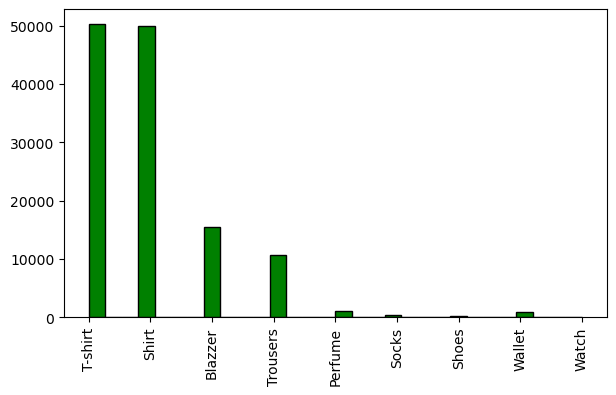

In [65]:
df['Category']=df['Category'].astype(str)
cut=df['Category']
plt.figure(figsize=(7,4))
ax=plt.hist(cut,bins=30,color="green",edgecolor="black")
plt.xticks(rotation=90)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

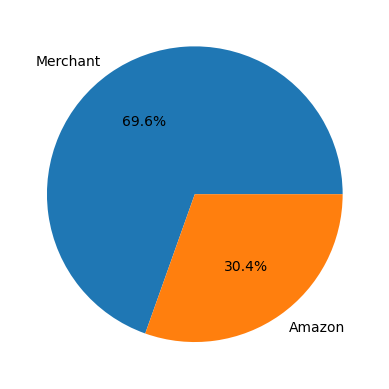

In [93]:
Fulfilment = df['Fulfilment'].value_counts()
my_labels=['Merchant','Amazon']
plt.pie(Fulfilment , labels=my_labels, autopct='%1.1f%%')
plt.show

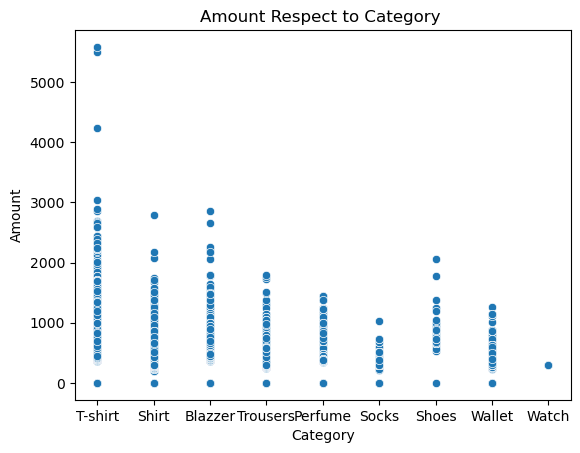

In [114]:
sns.scatterplot(data=df,x='Category',y='Amount')
plt.title("Amount Respect to Category ")
plt.show()

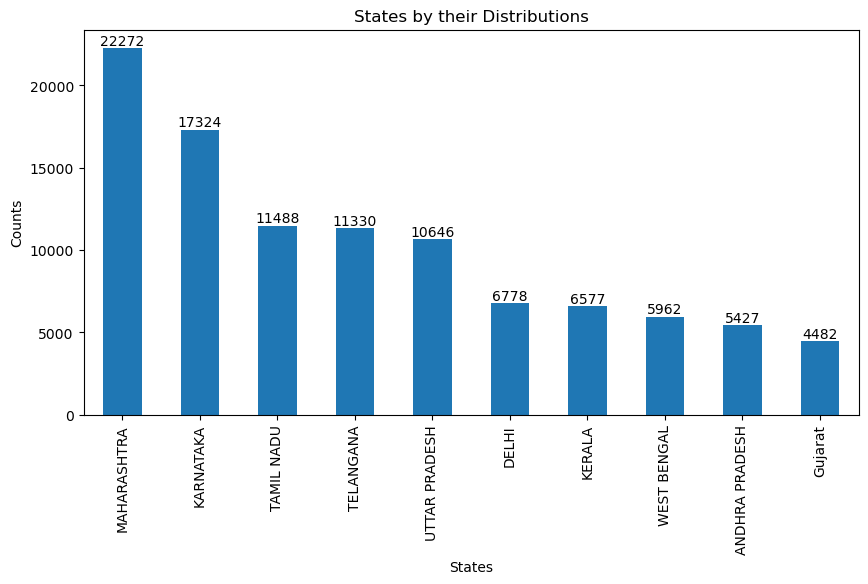

In [132]:
plt.figure(figsize=(10,5))
ax=df['ship-state'].value_counts().head(10).plot(kind="bar",title="States by their Distributions")
plt.xlabel("States")
plt.ylabel("Counts")
for bars in ax.containers:
   ax.bar_label(bars)
plt.show()